<a href="https://colab.research.google.com/github/L40S38/DetectiveConan_graphviz/blob/main/graph_viz_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 名探偵コナンのデータセットでGraphVizの練習をしよう

In [708]:
#anacondaでインストール可能
#%conda install -c conda-forge graphviz -y
#%conda install -c conda-forge python-graphviz -y

anacondaでインストールした場合は、以下のような資料を参考に環境変数の設定を行う。
- [Anaconda環境でGraphvizを使う](https://qiita.com/nemutas/items/4f7bd96f63cf78bdb357) by @nemutas
- [Graphvizは多分condaだけでインストールできるよって話](https://qiita.com/Colonel_GTU/items/4ad7449030c9e2c23427) by Colonel_GTU

（参考）私のWindowsの場合は`C:...\anaconda3\pkgs\graphviz-{version}-{hogehoge}\Library\bin`のパスにdot.exeがありました。

コマンドラインで`dot -V`を打ってバージョン情報(`dot - graphviz version 2.50.0 (0)`など)が出てくればOK

In [709]:
#colabのときはpipでインストールすればよい。
#%pip install graphviz

In [710]:
#!git clone https://github.com/L40S38/DetectiveConan_graphviz
#%cd DetectiveConan_graphviz

## graphvizのサンプルコード

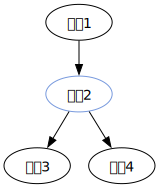

In [711]:
from graphviz import Digraph

dot = Digraph(format='png')
# フォント設定
dot.attr('node', fontname="MS Gothic")
# ノード作成
dot.node("項目1")
dot.node('項目2', color="#7799dd")
dot.node("項目3")
dot.node("項目4")
# エッジ作成
dot.edge("項目1", "項目2")
dot.edge("項目2", "項目3")
dot.edge("項目2", "項目4")
dot

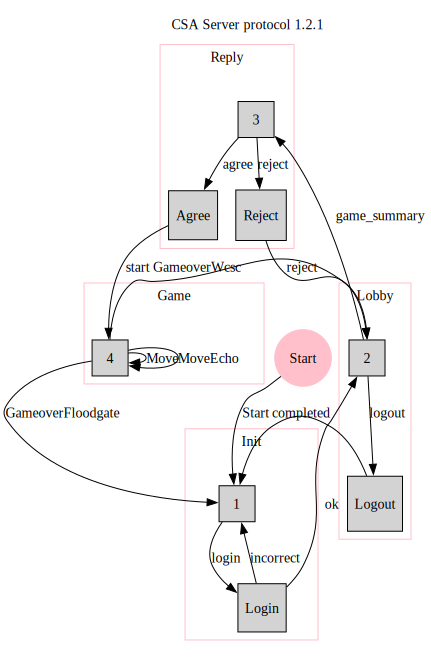

In [712]:
from graphviz import Digraph

# グラフの設定
g = Digraph(format="png")
g.attr("node", shape="square", style="filled")

# クラスター 'cluster_' から名前を始める必要あり
with g.subgraph(name='cluster_root') as c:
    # 一番外側のクラスターのラベルは図のタイトルのように見える
    c.attr(color='white', label='CSA Server protocol 1.2.1')

    # 開始ノード
    c.node("Start", shape="circle", color="pink")

    # ２つのノードと、その二間の有向な辺
    c.edge("Start", "1", label="Start")

    with c.subgraph(name='cluster_init') as c2:
        c2.attr(color='pink', label='Init')
        c2.node('1')
        c2.node('Login')
        c2.edge('1', 'Login', label='login')
        c2.edge('Login', '1', label='incorrect')

    with c.subgraph(name='cluster_lobby') as c2:
        c2.attr(color='pink', label='Lobby')
        c2.node('2')
        c2.node('Logout')
        c2.edge("2", "Logout", label="logout")

    with c.subgraph(name='cluster_reply') as c2:
        c2.attr(color='pink', label='Reply')
        c2.node('3')
        c2.node('Agree')
        c2.node('Reject')
        c2.edge("3", "Agree", label="agree")
        c2.edge("3", "Reject", label="reject")

    with c.subgraph(name='cluster_game') as c2:
        c2.attr(color='pink', label='Game')
        c2.node('4')
        c2.edge("4", "4", label="Move")
        c2.edge("4", "4", label="MoveEcho")

    c.edge("Login", "2", label="ok")
    c.edge("Logout", "1", label="completed")
    c.edge("Reject", "2", label="reject")
    c.edge("2", "3", label="game_summary")
    c.edge("Agree", "4", label="start")
    c.edge("4", "2", label="GameoverWcsc")
    c.edge("4", "1", label="GameoverFloodgate")
g

In [713]:
import glob
import pandas as pd

character_csv = glob.glob('./CaseClosed/characters/*.csv')
character_dict = dict()
for file in character_csv:
    df = pd.read_csv(file,encoding='utf-8')
    character_dict[df.columns[0]]=list(df[df.columns[0]])
character_dict

{'1年B組': ['小林澄子', '若狭留美', '東尾マリア', '坂本たくま'],
 '赤井家': ['メアリー・世良', '世良真純', '羽田秀𠮷', '赤井務武'],
 '黒の組織': ['ベルモット',
  'バーボン',
  'スコッチ',
  'ジン',
  'ウォッカ',
  'キャンティ',
  'コルン',
  'キール',
  'ライ',
  'シェリー',
  'ラム'],
 '爆発物処理班': ['松田陣平', '萩原研二'],
 'CIA・本堂家': ['本堂瑛海', 'イーサン・本堂', '本堂瑛祐'],
 '少年探偵団': ['吉田歩美', '小嶋元太', '円谷光彦', '灰原哀'],
 '芸能界': ['水無玲奈', '沖野ヨーコ', 'クリス・ヴィンヤード', 'シャロン・ヴィンヤード'],
 'FBI': ['赤井秀一', 'ジョディ・スターリング', 'ジェイムズ・ブラック', 'アンドレ・キャメル'],
 '群馬県警': ['山村ミサオ'],
 '羽田家': ['羽田浩司', '羽田康晴', '羽田市代'],
 'いろは寿司': ['脇田兼則'],
 '神奈川県警': ['萩原千速', '横溝重悟'],
 '工藤家': ['工藤新一', '江戸川コナン', '工藤優作', '工藤有希子', '沖矢昴'],
 '黒羽家': ['黒羽盗一', '黒羽千影', '黒羽快斗'],
 '警視庁捜査一課': ['佐藤美和子', '高木渉', '千葉和伸', '白鳥任三郎', '伊達航', '目暮十三', '黒田兵衛'],
 '警視庁捜査二課': ['中森銀三', '茶木神太郎'],
 '警視庁交通部': ['三池苗子', '宮本由美'],
 '宮野家': ['宮野エレーナ', '宮野志保', '宮野明美', '宮野厚司'],
 '毛利家': ['毛利蘭', '毛利小五郎', '妃英理'],
 '長野県警': ['諸伏高明', '大和勘助', '上原由衣'],
 '大阪府警': ['遠山銀司郎', '服部平蔵', '大滝悟郎'],
 '喫茶ポアロ': ['安室透', '榎本梓'],
 '公安': ['降谷零', '諸伏景光', '風見裕也'],
 '静岡県警': ['横溝参悟'],
 'スポーツ界': ['京極真', '比護隆佑',

In [714]:
relations = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
relations

,character1,character2,label,vec
0,ベルモット,クリス・ヴィンヤード,同一人物,0.0
1,ベルモット,シャロン・ヴィンヤード,同一人物,0.0
2,バーボン,降谷零,同一人物,0.0
3,バーボン,安室透,同一人物,0.0
4,安室透,毛利小五郎,弟子入り,1.0
...,...,...,...,...
96,毛利小五郎,沖野ヨーコ,ファン,1.0
97,鈴木園子,京極真,恋人,0.0
98,灰原哀,比護隆佑,ファン,1.0
99,鈴木園子,怪盗キッド,ファン,1.0


labelはcharacter1とcharacter2の関係性を、vecは1方向か双方向かを示している。

In [715]:
character_dict.keys()

dict_keys(['1年B組', '赤井家', '黒の組織', '爆発物処理班', 'CIA・本堂家', '少年探偵団', '芸能界', 'FBI', '群馬県警', '羽田家', 'いろは寿司', '神奈川県警', '工藤家', '黒羽家', '警視庁捜査一課', '警視庁捜査二課', '警視庁交通部', '宮野家', '毛利家', '長野県警', '大阪府警', '喫茶ポアロ', '公安', '静岡県警', 'スポーツ界', '鈴木家', '大阪・京都'])

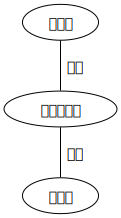

In [716]:
## 一部のキャラクターのみ表示する
import glob

characters_dot = Digraph(format='png')
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
k = '毛利家' #must be in ['黒の組織', 'FBI', 'メインキャラ', '宮野家', '警察', '大阪・京都']
for c in character_dict[k]:
    characters_dot.node(c)
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if not c1 in character_dict[k] or not c2 in character_dict[k]:
        continue
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

In [717]:
default_color = 'black'
same_person_color = 'lightslateblue'
lovers_color = 'orchid1'
evil_color = 'red4'
friend_color = 'orange'

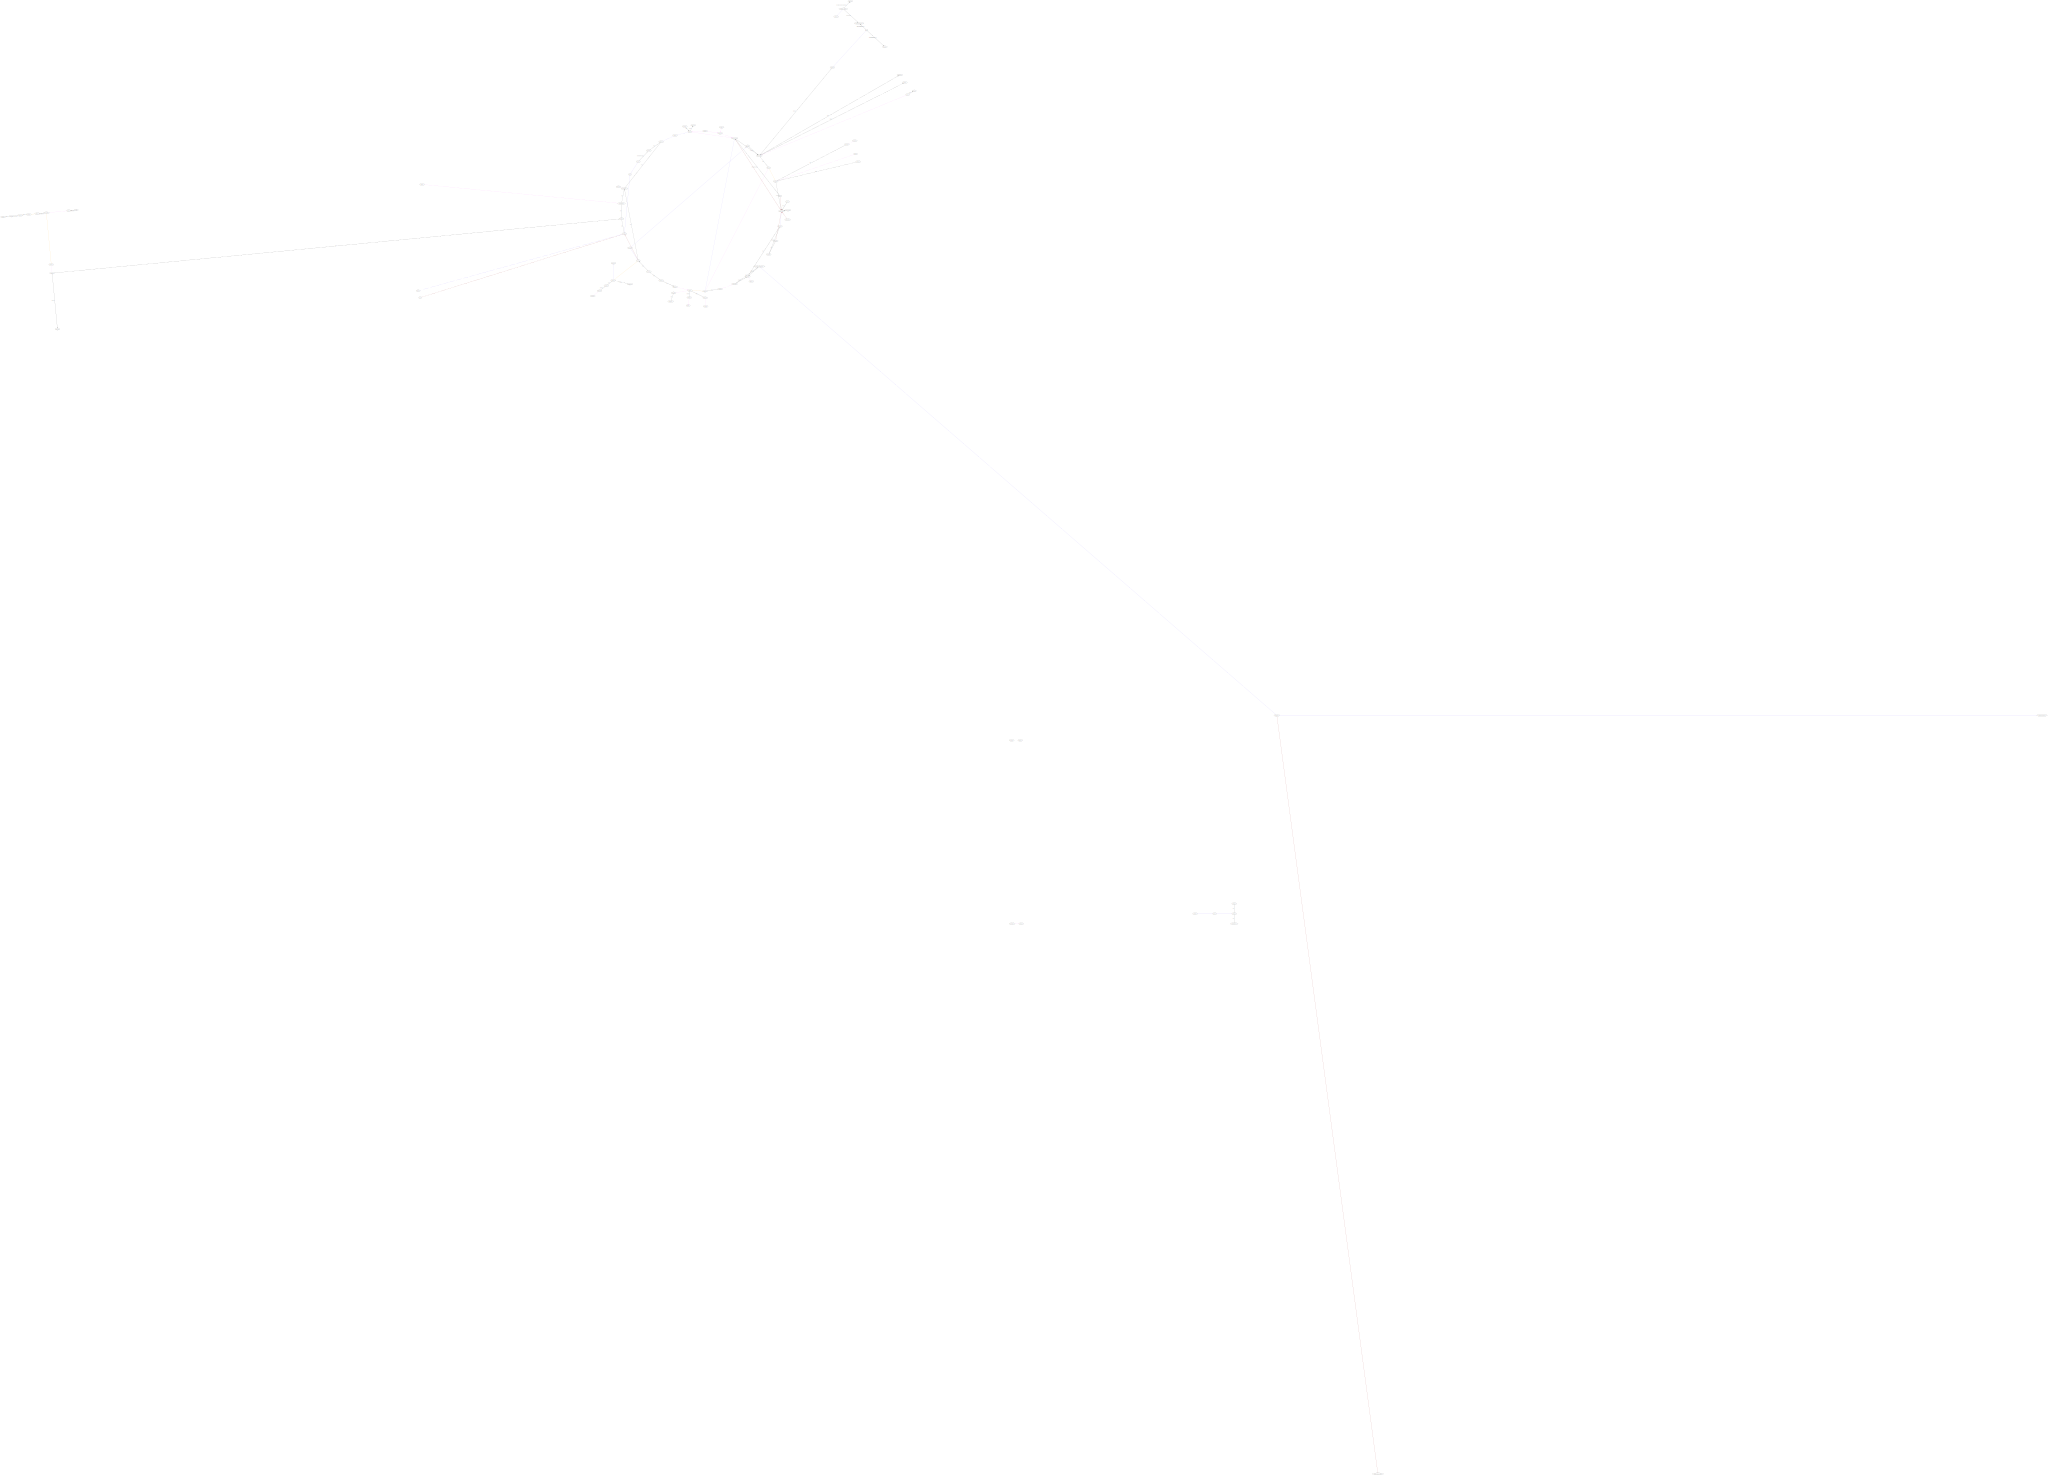

In [718]:
characters_dot = Digraph(format='png')

# must be one of ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
characters_dot.engine = "circo" # recommend 'dot' or 'fdp'
characters_dot.attr('graph', fontname="MS Gothic", colorscheme="paired9")
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")
df = pd.read_csv('./CaseClosed/relations.csv',encoding='utf-8')
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    color=default_color
    if label=='同一人物':
        color=same_person_color
        label=''
    elif label in ["好き","両想い","両片思い","恋人","夫婦"]:
        color = lovers_color
        label=''
    elif label=='敵対視':
        color=evil_color
        label=''
    elif label=='親友' or '親友' in label:
        color=friend_color
        label=''
    try:
        if df['vec'][i]==0:#双方向
            characters_dot.edge(c1,c2,label=label,color=color,dir='none')
        else:#1方向
            characters_dot.edge(c1,c2,label=label,color=color)
    except:
        print(f'edge construct error: {c1,c2,label}')
characters_dot

In [719]:
for i,k in enumerate(character_dict.keys()):
    print(i,k)
    with characters_dot.subgraph(name='cluster_'+k) as sg:
        sg.attr(label=k,color=str(i%9+1))
        for c in character_dict[k]:
            sg.node(c)

0 1年B組
1 赤井家
2 黒の組織
3 爆発物処理班
4 CIA・本堂家
5 少年探偵団
6 芸能界
7 FBI
8 群馬県警
9 羽田家
10 いろは寿司
11 神奈川県警
12 工藤家
13 黒羽家
14 警視庁捜査一課
15 警視庁捜査二課
16 警視庁交通部
17 宮野家
18 毛利家
19 長野県警
20 大阪府警
21 喫茶ポアロ
22 公安
23 静岡県警
24 スポーツ界
25 鈴木家
26 大阪・京都


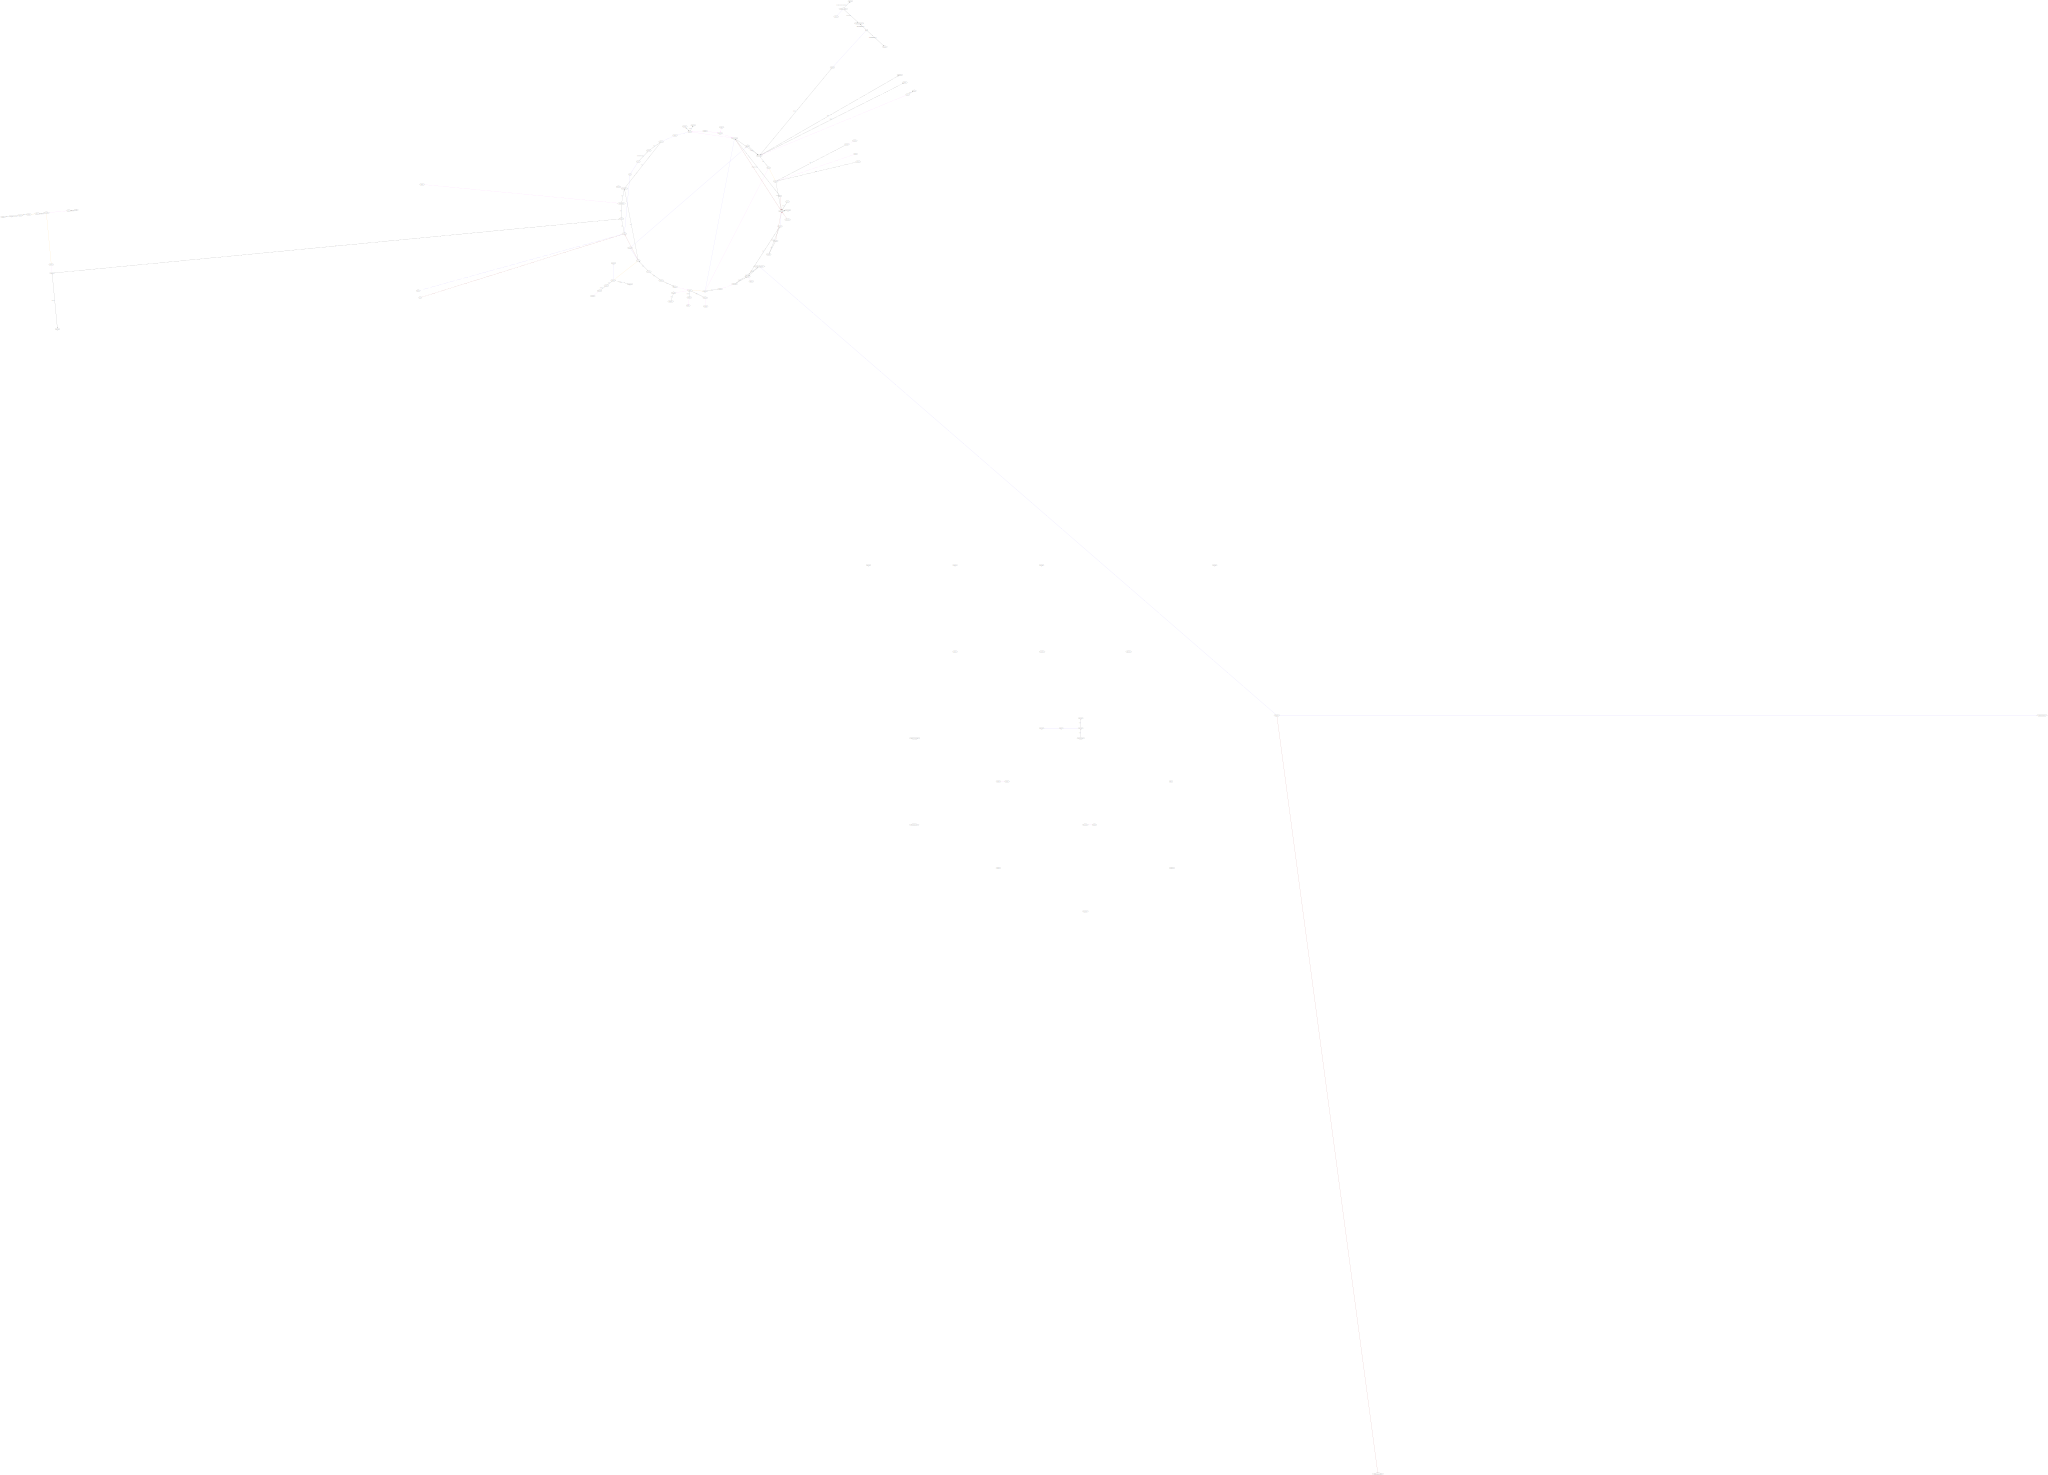

In [720]:
characters_dot

In [721]:
characters_dot.render('DetectiveConan_characters_graph_'+characters_dot.engine) #画像の保存

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.617721 to fit


'DetectiveConan_characters_graph_circo.png'

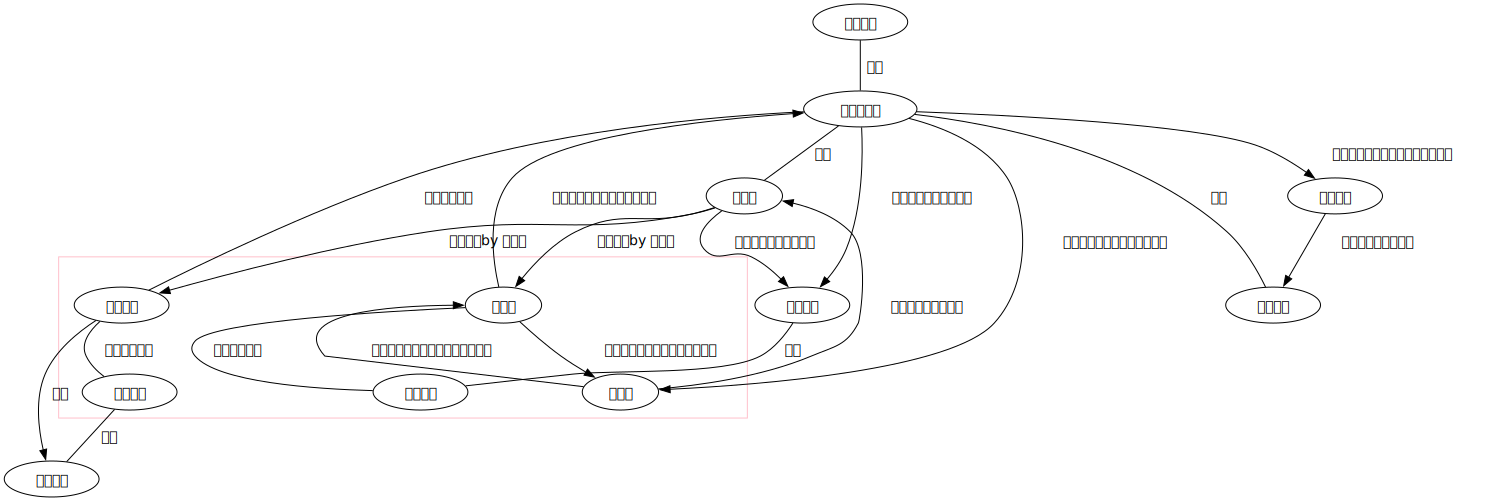

In [722]:
#Wild Police Story関連
from graphviz import Digraph
import pandas as pd
import glob

character_csv = glob.glob('./WildPoliceStory/characters/*.csv')
character_dict = dict()
for file in character_csv:
    df = pd.read_csv(file,encoding='utf-8')
    character_dict[df.columns[0]]=list(df[df.columns[0]])

characters_dot = Digraph(format='png')

# must be one of ['circo', 'dot', 'fdp', 'neato', 'osage', 'patchwork', 'sfdp', 'twopi']
characters_dot.engine = "dot"
characters_dot.attr('node', fontname="MS Gothic")
characters_dot.attr('edge', fontname="MS Gothic")

for k in character_dict.keys():
    with characters_dot.subgraph(name='cluster'+k) as sg:
        sg.attr(color='pink',label=k)
        for c in character_dict[k]:
            sg.node(c)

df = pd.read_csv('./WildPoliceStory/relations.csv',encoding='utf-8')
for i in range(len(df)):
    c1,c2,label = df['character1'][i], df['character2'][i], df['label'][i]
    if df['vec'][i]==0:#双方向
        characters_dot.edge(c1,c2,label=label,dir='none')
    else:#1方向
        characters_dot.edge(c1,c2,label=label)
characters_dot

In [723]:
characters_dot.render('WildPoliceStories_characters_graph') #画像の保存

'WildPoliceStories_characters_graph.png'